# **DATA 201 - Project**

#### Shiyan Wei 300569298

In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#### Load the dataset

In [2]:
# load dataset and read data
train_data = pd.read_csv("train.csv")
train_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,h1n1_vaccine
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,0.0,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0,0
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"> $75,000",Married,Own,Employed,2.0,0.0,0
3,0.0,2.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,< 12 Years,Black,Female,Below Poverty,Not Married,Rent,Unemployed,0.0,0.0,0


#### Initial Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24036 entries, 0 to 24035
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 23956 non-null  float64
 1   h1n1_knowledge               23932 non-null  float64
 2   behavioral_antiviral_meds    23977 non-null  float64
 3   behavioral_avoidance         23852 non-null  float64
 4   behavioral_face_mask         24020 non-null  float64
 5   behavioral_wash_hands        23996 non-null  float64
 6   behavioral_large_gatherings  23953 non-null  float64
 7   behavioral_outside_home      23964 non-null  float64
 8   behavioral_touch_face        23921 non-null  float64
 9   doctor_recc_h1n1             22077 non-null  float64
 10  doctor_recc_seasonal         22077 non-null  float64
 11  chronic_med_condition        23158 non-null  float64
 12  child_under_6_months         23289 non-null  float64
 13  health_worker   

In [4]:
# check missing values
columns_with_nan = train_data.columns[train_data.isna().any()].tolist()
for column in columns_with_nan:
    nan_count = train_data[column].isna().sum()
    print(f"Columns: {column}, NaN count: {nan_count}")

print("Number of nan columns", len(columns_with_nan))

Columns: h1n1_concern, NaN count: 80
Columns: h1n1_knowledge, NaN count: 104
Columns: behavioral_antiviral_meds, NaN count: 59
Columns: behavioral_avoidance, NaN count: 184
Columns: behavioral_face_mask, NaN count: 16
Columns: behavioral_wash_hands, NaN count: 40
Columns: behavioral_large_gatherings, NaN count: 83
Columns: behavioral_outside_home, NaN count: 72
Columns: behavioral_touch_face, NaN count: 115
Columns: doctor_recc_h1n1, NaN count: 1959
Columns: doctor_recc_seasonal, NaN count: 1959
Columns: chronic_med_condition, NaN count: 878
Columns: child_under_6_months, NaN count: 747
Columns: health_worker, NaN count: 735
Columns: health_insurance, NaN count: 11098
Columns: opinion_h1n1_vacc_effective, NaN count: 354
Columns: opinion_h1n1_risk, NaN count: 353
Columns: opinion_h1n1_sick_from_vacc, NaN count: 356
Columns: opinion_seas_vacc_effective, NaN count: 421
Columns: opinion_seas_risk, NaN count: 469
Columns: opinion_seas_sick_from_vacc, NaN count: 483
Columns: education, NaN c

In [5]:
# shows a statistical summary of the data set
print(train_data.describe())

       h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  23956.000000    23932.000000               23977.000000   
mean       1.616171        1.261073                   0.048755   
std        0.909692        0.618372                   0.215360   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          23852.000000          24020.000000           23996.000000   
mean               0.726061              0.067236               0.827138   
std                0.445988              0.250435               0.378136   
min                0.000000              0.000000               0.000000   
25%                0.0000

+ The dataset comprises 24,036 instances and 32 columns, with 24 columns representing numerical variables and 8 columns representing categorical variables.

+ There are 28 attributes with missing values in the dataset.

+ For the initial statistical analysis of each numerical column, the data appears to be well-balanced, and I did not observe any significant outliers in the dataset.


#### Explore train data and gain some insights.

In [6]:
# explore values in categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

print("All categorical columns with unique values:\n")
for column in categorical_columns:
    print(column, pd.unique(train_data[column]))    

All categorical columns with unique values:

age_group ['45 - 54 Years' '35 - 44 Years' '65+ Years' '55 - 64 Years'
 '18 - 34 Years']
education ['12 Years' 'College Graduate' '< 12 Years' 'Some College' nan]
race ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex ['Male' 'Female']
income_poverty ['<= $75,000, Above Poverty' '> $75,000' 'Below Poverty' nan]
marital_status ['Not Married' 'Married' nan]
rent_or_own ['Own' 'Rent' nan]
employment_status ['Employed' 'Not in Labor Force' 'Unemployed' nan]


In [7]:
# explore numerical attributes.
numerical_data  = train_data.select_dtypes(include=['number']) # select all numerical attributes


In [8]:
len(numerical_data .columns)

24

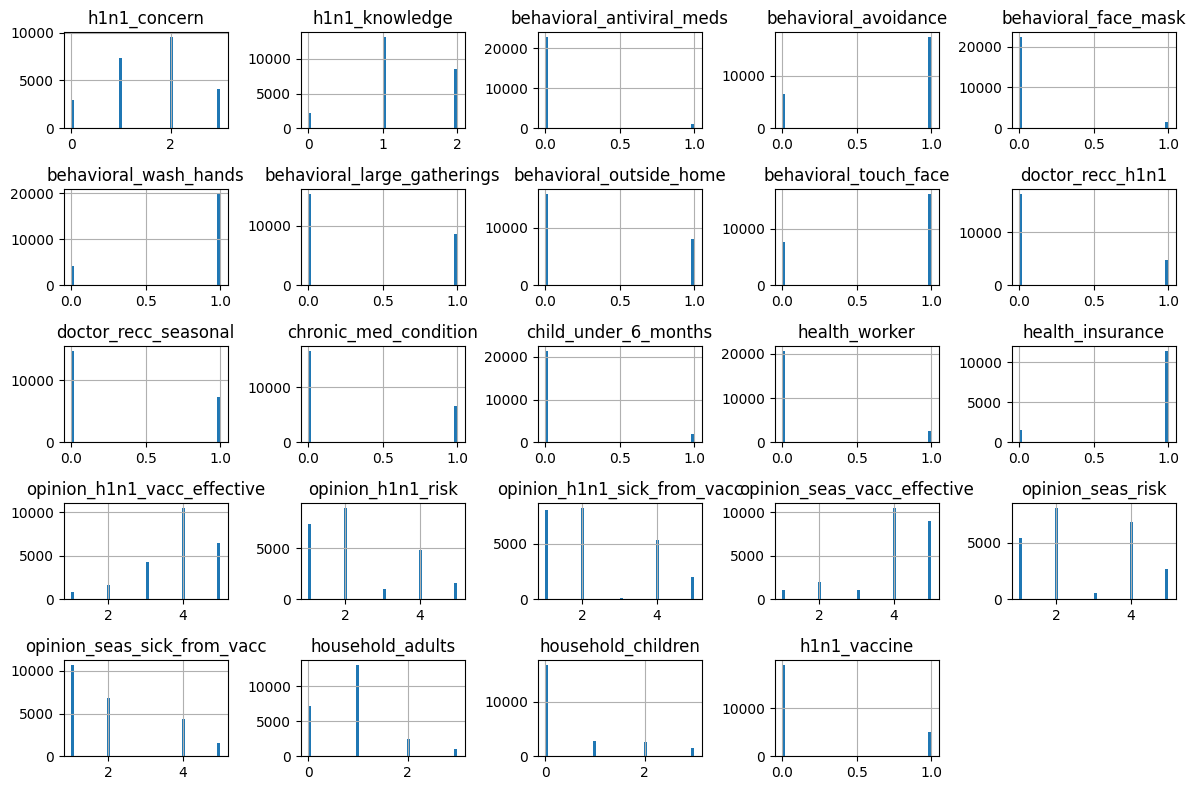

In [9]:
numerical_data .hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

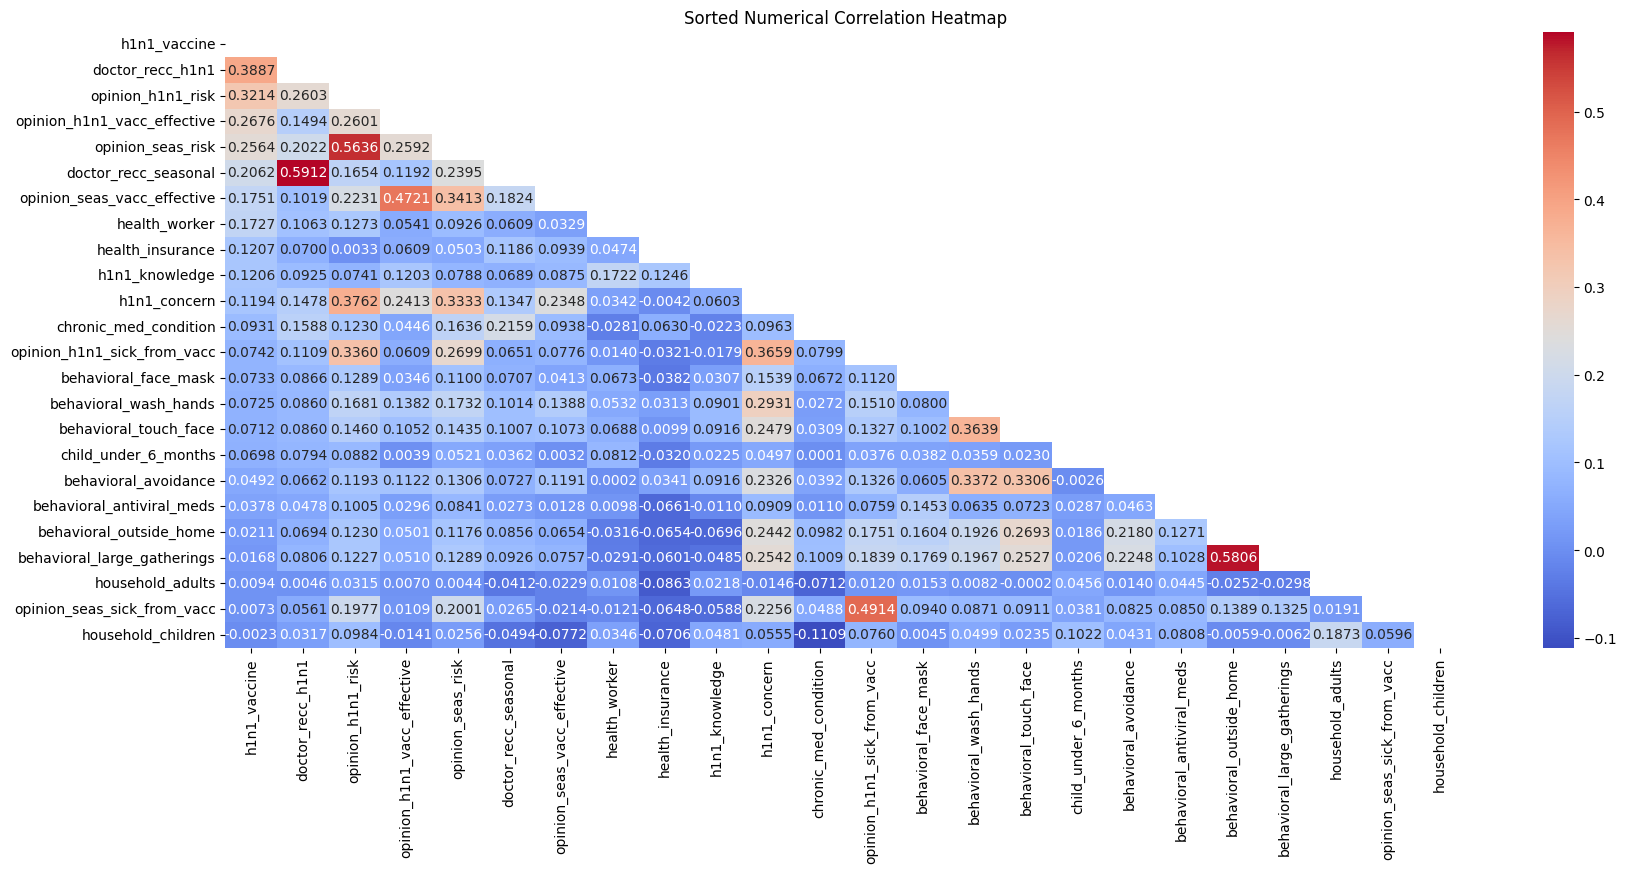

In [10]:
# calculate correlation in numerical variables.
numerical_corr = numerical_data.corr()
# Calculate the correlation between each numerical feature and the target variable 'h1n1_vaccine'
feature_target_correlation = numerical_data.corrwith(train_data['h1n1_vaccine'])

# sort and reorder features
sorted_features = feature_target_correlation.abs().sort_values(ascending=False).index
sorted_numerical_corr = numerical_corr.loc[sorted_features, sorted_features]

mask = np.triu(np.ones_like(sorted_numerical_corr, dtype=bool))
# display heat map
plt.figure(figsize=(20, 8))
sns.heatmap(data=sorted_numerical_corr, annot=True, cmap='coolwarm', fmt=".4f", mask=mask)
plt.title('Sorted Numerical Correlation Heatmap')
plt.show()


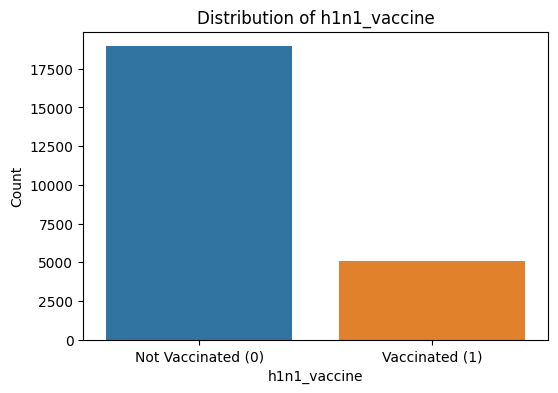

In [11]:
counts = train_data['h1n1_vaccine'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('h1n1_vaccine')
plt.ylabel('Count')
plt.title('Distribution of h1n1_vaccine')
plt.xticks([0, 1], ['Not Vaccinated (0)', 'Vaccinated (1)']) 
plt.show()

+ Regarding the categorical columns, we plan to use an ordinal encoder for 'age_group' and 'income_poverty' due to their inherent order, while other columns can be encoded using either a label encoder or a one-hot encoder.

+ The correlation values between 'household_adults', 'opinion_seas_sick_from_vacc', and 'household_children' and the target variable ('h1n1_vaccine') are close to zero, indicating a weak relationship. Consequently, I am considering removing these columns at a later steps to enhance prediction efficiency.

+ There is a high correlation observed between 'doctor_recc_h1n1' and 'doctor_recc_seasonal', as well as between 'opinion_h1n1_risk' and 'opinion_seas_risk', along with 'behavioral_outside_home' and 'behavioral_large_gatherings'.

+ The most of numerical variables predominantly consist of binary data, indicating that we do not require standard scaling but should instead prioritize addressing missing values.

#### Prepare the data for Machine Learning algorithm



+ seperate features and target attributes.
+ drop missing values.
+ encode categorical variables, separetely by one-hot encoder and ordinary encoder.
+ transform same data preprocessing steps on test data.

In [12]:
# load test data
test_data = pd.read_csv("test.csv")

In [13]:
test_data.shape

(2671, 32)

In [14]:
train_data.shape

(24036, 32)

In [15]:
test_data.isnull().sum()

h1n1_concern                     12
h1n1_knowledge                   12
behavioral_antiviral_meds        12
behavioral_avoidance             24
behavioral_face_mask              3
behavioral_wash_hands             2
behavioral_large_gatherings       4
behavioral_outside_home          10
behavioral_touch_face            13
doctor_recc_h1n1                201
doctor_recc_seasonal            201
chronic_med_condition            93
child_under_6_months             73
health_worker                    69
health_insurance               1176
opinion_h1n1_vacc_effective      37
opinion_h1n1_risk                35
opinion_h1n1_sick_from_vacc      39
opinion_seas_vacc_effective      41
opinion_seas_risk                45
opinion_seas_sick_from_vacc      54
age_group                         0
education                       124
race                              0
sex                               0
income_poverty                  446
marital_status                  130
rent_or_own                 

In [16]:
train_data.shape

(24036, 32)

In [17]:
# Drop rows with missing values from the training set
train_data_drop_nan = train_data.dropna()

# check 
column_with_nan = train_data.columns[train_data_drop_nan.isna().any()].tolist()
if len(column_with_nan) > 0:
    print("There are columns with missing values on train data.")
else:
    print("No columns with missing values on train data.")

No columns with missing values on train data.


In [18]:
# separete the features and target in train set.
X_train = train_data_drop_nan.drop("h1n1_vaccine", axis=1) 
y_train = train_data_drop_nan["h1n1_vaccine"].copy() 


In [19]:
X_train.shape

(10590, 31)

In [20]:
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()
# len(numerical_columns.columns)

categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
columns_to_remove = ['age_group', 'education', 'income_poverty']

nominal_columns = [col for col in categorical_columns if col not in columns_to_remove]
ordinal_columns = columns_to_remove

print("Numerical Columns:", numerical_columns)
print("Nominal Columns:", nominal_columns)
print("Ordinal Columns:", ordinal_columns)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
Nominal Columns: ['race', 'sex', 'marital_status', 'rent_or_own', 'employment_status']
Ordinal Columns: ['age_group', 'education', 'income_poverty']


In [21]:
# Define the pipeline for data processing
nominal_preprocessor = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ordinal_preprocessor =  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor_v1 =ColumnTransformer([
    ('one-hot-encoder', nominal_preprocessor, nominal_columns),
    ('ordinal-encoder', ordinal_preprocessor, ordinal_columns)],
    remainder='passthrough'
)


# Fit the preprocessor to the training data
X_train_v1 = preprocessor_v1.fit_transform(X_train)

# Transform the training data using the preprocessor
# X_train_encoded_v1 = preprocessor_v1.transform(X_train_v1)

# Get the feature names for the one-hot encoded nominal columns
nominal_feature_names = preprocessor_v1.named_transformers_['one-hot-encoder'].get_feature_names_out(input_features=nominal_columns)

# Create a DataFrame with the encoded features
X_train_encode_df = pd.DataFrame(X_train_v1, columns=list(nominal_feature_names) + ordinal_columns + numerical_columns)

X_train_encode_df.head()

,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,4.0,1.0,4.0,4.0,2.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,5.0,2.0,4.0,5.0,2.0,1.0,1.0,0.0


In [22]:
X_train.shape

(10590, 31)

In [23]:
X_train_encode_df.shape

(10590, 39)

In [24]:
y_train.shape

(10590,)

In [25]:
# transform on test data

# Drop rows with missing values from the test set
test_data_drop_nan = test_data.dropna()
print("After drop missing values", test_data_drop_nan.shape)

# check if still exist missing values
if len(test_data.columns[test_data_drop_nan.isna().any()].tolist()) > 0:
    print("There are columns with missing values in test data.")
else:
    print("No columns with missing values in test data.")

# seperate features and targets
X_test = test_data_drop_nan.drop("h1n1_vaccine", axis=1) 
y_test = test_data_drop_nan["h1n1_vaccine"].copy() 

# Fit the preprocessor to the test data
X_test_v1 = preprocessor_v1.fit_transform(X_test)

# Transform the test data using the preprocessor
# X_test_encoded = preprocessor_v1.transform(X_test_v1)

# Get the feature names for the one-hot encoded nominal columns
nominal_feature_names = preprocessor_v1.named_transformers_['one-hot-encoder'].get_feature_names_out(input_features=nominal_columns)

# Create a DataFrame with the encoded features
X_test_encode_df = pd.DataFrame(X_test_v1, columns=list(nominal_feature_names) + ordinal_columns + numerical_columns)

X_test_encode_df.head()


After drop missing values (1204, 32)
No columns with missing values in test data.


,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,5.0,5.0,2.0,5.0,5.0,4.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,4.0,2.0,2.0,5.0,2.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,4.0,2.0,1.0,4.0,2.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,1.0,1.0,5.0,5.0,1.0,1.0,0.0


In [26]:
X_test_encode_df.shape

(1204, 39)

In [27]:
y_test.shape

(1204,)

#### Select machine learning models

In this project, I would choose a classification model rather than a regression model. The reason for this choice is that the target variable, "h1n1_vaccine," is binary, indicating whether a person received the H1N1 vaccine (1 for Yes, 0 for No).

In [28]:
import time
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_curve

def classification_experiment(X_train, y_train, X_test, y_test, classifier='knn'):
    """
    Perform an experiment on a dataset with a specified classification model using default hyperparameters.

    Parameters:
        X_train: Training data features.
        X_test: Testing data features.
        y_train: Target labels for training.
        y_test: Target labels for testing.
        classifier (str, optional): Specifies the classification model to use. Default is 'knn'.
            Options: 'knn',  'svm', 'decision_tree', 'random_forest',  'gradient_boosting',  'logistic_regression'.

    Returns:
        result_metrics (dict): Dictionary containing classification metrics.
            - 'Accuracy': Accuracy score.
            - 'Precision': Precision score.
            - 'Sensitivity': Recall score.
            - 'F1-Score': F1-Score score.
            - 'mean_AUC_5_folds': Mean of AUC
            - 'AUC': Area Under the Receiver Operating Characteristic Curve (ROC AUC) score.
            - 'AUC-PR: 
            - 'specificity: 
            - 'Runtime': Runtime value (in seconds).
    """
    result_metrics = {
        'Accuracy': None,
        'Precision': None,
        'Sensitivity(Recall)': None,
        'F1-Score': None,
        'mean_AUC_5_folds': None,
        'roc_auc': None,
        'AUC_PR': None,
        'specificity': None,
        'y_pred_prob': None,
        'Runtime': None
    }
    
    if classifier == 'knn':
        model = Pipeline([
    
            ('classifier', KNeighborsClassifier())
        ])
    
    elif classifier == 'svm':
        model = Pipeline([
           
            ('classifier', SVC(probability=True))
        ])
    elif classifier == 'dt':
        model = Pipeline([
           
            ('classifier', DecisionTreeClassifier())
        ])
    elif classifier == 'rf':
        model = Pipeline([
            
            ('classifier', RandomForestClassifier())
        ])
    
    elif classifier == 'gb':
        model = Pipeline([
          
            ('classifier', GradientBoostingClassifier())
        ])
    
    elif classifier == 'lr':
        model = Pipeline([
           
            ('classifier', LogisticRegression(max_iter=1000))
        ])
    else:
        raise ValueError("Invalid classifier. Options: 'knn', 'naive_bayes', etc.")
            
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    end_time = time.time()

    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) 
    auc_pr = average_precision_score(y_test, y_pred_prob)
    precision = precision_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    auc_scores =  cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    auc_mean = auc_scores.mean()
    auc_std = auc_scores.std() * 2

    
    runtime  = end_time - start_time

    accuracy = round(accuracy, 4)
    precision = round(precision, 4)
    sensitivity = round(sensitivity, 4)
    f1 = round(f1, 4)
    specificity = round(specificity, 4)
    roc_auc = round(roc_auc, 4)
    auc_pr = round(auc_pr, 4)
    auc_str = "%0.4f (+/- %0.4f)" % (auc_mean, auc_std)
    runtime = round(runtime, 4)

    result_metrics['Accuracy'] = accuracy
    result_metrics['Precision'] = precision
    result_metrics['Sensitivity(Recall)'] = sensitivity
    result_metrics['F1-Score'] = f1
    result_metrics['mean_AUC_5_folds'] = auc_str
    result_metrics['roc_auc'] = roc_auc
    result_metrics['AUC_PR'] = auc_pr
    result_metrics['specificity'] = specificity
    result_metrics['y_pred_prob'] = y_pred_prob
    result_metrics['Runtime'] = runtime

    return result_metrics


In [29]:
# (1) knn
knn_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'knn')
knn_result

{'Accuracy': 0.7766,
 'Precision': 0.694,
 'Sensitivity(Recall)': 0.4987,
 'F1-Score': 0.5803,
 'mean_AUC_5_folds': '0.7742 (+/- 0.0247)',
 'roc_auc': 0.7903,
 'AUC_PR': 0.6238,
 'specificity': 0.9013,
 'y_pred_prob': array([0.6, 0. , 0. , ..., 0.4, 0.4, 0.2]),
 'Runtime': 0.107}

In [30]:
# (2) SVM
svm_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'svm')
svm_result

{'Accuracy': 0.8389,
 'Precision': 0.8231,
 'Sensitivity(Recall)': 0.6113,
 'F1-Score': 0.7015,
 'mean_AUC_5_folds': '0.8566 (+/- 0.0230)',
 'roc_auc': 0.8715,
 'AUC_PR': 0.7897,
 'specificity': 0.941,
 'y_pred_prob': array([0.82647079, 0.675615  , 0.17010552, ..., 0.27295415, 0.53169413,
        0.11881191]),
 'Runtime': 26.6617}

In [31]:
# (3) decision tree
dt_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'dt')
dt_result

{'Accuracy': 0.7184,
 'Precision': 0.5455,
 'Sensitivity(Recall)': 0.5469,
 'F1-Score': 0.5462,
 'mean_AUC_5_folds': '0.6780 (+/- 0.0170)',
 'roc_auc': 0.6712,
 'AUC_PR': 0.4387,
 'specificity': 0.7954,
 'y_pred_prob': array([1., 1., 0., ..., 0., 1., 0.]),
 'Runtime': 0.0636}

In [32]:
# (4) random forest
rf_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'rf')
rf_result

{'Accuracy': 0.8297,
 'Precision': 0.7979,
 'Sensitivity(Recall)': 0.6032,
 'F1-Score': 0.687,
 'mean_AUC_5_folds': '0.8512 (+/- 0.0145)',
 'roc_auc': 0.8635,
 'AUC_PR': 0.7632,
 'specificity': 0.9314,
 'y_pred_prob': array([0.56, 0.64, 0.23, ..., 0.29, 0.48, 0.06]),
 'Runtime': 1.6633}

In [33]:
# (5) gradient Boosting
gb_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'gb')
gb_result

{'Accuracy': 0.8272,
 'Precision': 0.7759,
 'Sensitivity(Recall)': 0.622,
 'F1-Score': 0.6905,
 'mean_AUC_5_folds': '0.8648 (+/- 0.0179)',
 'roc_auc': 0.8773,
 'AUC_PR': 0.7917,
 'specificity': 0.9194,
 'y_pred_prob': array([0.77288198, 0.61664852, 0.18537956, ..., 0.27611713, 0.54333704,
        0.07064408]),
 'Runtime': 2.2025}

In [34]:
# (6) logistic regression
lr_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'lr')
lr_result

{'Accuracy': 0.8272,
 'Precision': 0.7759,
 'Sensitivity(Recall)': 0.622,
 'F1-Score': 0.6905,
 'mean_AUC_5_folds': '0.8588 (+/- 0.0196)',
 'roc_auc': 0.8724,
 'AUC_PR': 0.7773,
 'specificity': 0.9194,
 'y_pred_prob': array([0.92137836, 0.72347089, 0.19340525, ..., 0.19258925, 0.53454815,
        0.10820254]),
 'Runtime': 0.1852}

In [35]:
# Create an empty DataFrame to store the results
output = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Sensitivity(Recall)', 'F1-Score', 'mean_AUC_5_folds', 
                               'roc_auc','AUC_PR','specificity','Runtime (second)'])

# Define a function to add results to the output DataFrame
def add_result_to_output(algorithm, result_dict):
    result = {
        'Algorithm': algorithm,
        'Accuracy': f'{result_dict["Accuracy"]:.2f}',
        'Precision': f'{result_dict["Precision"]:.2f}',
        'Sensitivity(Recall)': f'{result_dict["Sensitivity(Recall)"]:.2f}',
        'F1-Score': f'{result_dict["F1-Score"]:.2f}',
        'mean_AUC_5_folds': f'{result_dict["mean_AUC_5_folds"]}',
        'roc_auc': f'{result_dict["roc_auc"]}',
        'AUC_PR':f'{result_dict["AUC_PR"]}',
        'specificity':f'{result_dict["specificity"]}',
        'Runtime (second)': f'{result_dict["Runtime"]:.2f}'
    }
    output.loc[len(output)] = result

In [36]:
# Use the add_result_to_output function to add the results with a different algorithm name

add_result_to_output('knn', knn_result)
add_result_to_output('SVM', svm_result)
add_result_to_output('decision tree', dt_result)
add_result_to_output('random forest', rf_result)
add_result_to_output('gradient Boosting', gb_result)
add_result_to_output('logistic regression', lr_result)
output

,Algorithm,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,Runtime (second)
0,knn,0.78,0.69,0.50,0.58,0.7742 (+/- 0.0247),0.7903,0.6238,0.9013,0.11
1,SVM,0.84,0.82,0.61,0.70,0.8566 (+/- 0.0230),0.8715,0.7897,0.941,26.66
2,decision tree,0.72,0.55,0.55,0.55,0.6780 (+/- 0.0170),0.6712,0.4387,0.7954,0.06
3,random forest,0.83,0.80,0.60,0.69,0.8512 (+/- 0.0145),0.8635,0.7632,0.9314,1.66
4,gradient Boosting,0.83,0.78,0.62,0.69,0.8648 (+/- 0.0179),0.8773,0.7917,0.9194,2.20
5,logistic regression,0.83,0.78,0.62,0.69,0.8588 (+/- 0.0196),0.8724,0.7773,0.9194,0.19


I define a function to help appying data in the models, there are summarized the performance of different models on unseen data in the table provided.

+ Models such as SVM, Gradient Boosting, Random Forest, and Logistic Regression demonstrate strong performance, while Decision Tree performs moderately, and K-Nearest Neighbors exhibits relatively lower performance. 

+ I'll start with Logistic Regression (Model A) for optimization due to its lower runtime, efficiency, and ease of interpretability in understanding feature impacts on the target variable.

+ Then, I'll choose SVM as Model B because we only need to select a few features, potentially reducing its runtime. SVM also exhibits strong performance across various metrics like accuracy and AUC, striking a balance between interpretability and predictive power.


#### Model A - Logistic Regression

To optimize the logistic regression model, I will:

+ Encode nominal columns by label encoder instead of one-hot encoder.
+ Use grid search to find the best parameter for the model.

In [37]:
from sklearn.preprocessing import LabelEncoder
x_train_encode = X_train.copy()
x_test_encode = X_test.copy()

label_nominal_preprocessor = LabelEncoder()

for col in nominal_columns:
    x_train_encode[col] = label_nominal_preprocessor.fit_transform(x_train_encode[col])
    x_test_encode[col] = label_nominal_preprocessor.fit_transform(x_test_encode[col])

x_train_encode[ordinal_columns] = ordinal_preprocessor.fit_transform(x_train_encode[ordinal_columns])  
x_test_encode[ordinal_columns] = ordinal_preprocessor.fit_transform(x_test_encode[ordinal_columns])  

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a grid of hyperparameters to search over
param_grid = {
    'C': [1, 1.5, 1.8, 2],
    'max_iter': [500, 1000], 
}

# Create a LogisticRegression model
lr_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the preprocessed training data
grid_search.fit(x_train_encode, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

best_params


{'C': 1.8, 'max_iter': 500}

In [39]:
from sklearn.metrics import roc_curve
# improved_lr_model = LogisticRegression(C=10, class_weight='balanced', max_iter=500, solver='lbfgs')
improved_lr_model = LogisticRegression(C=1.8, max_iter=500)
improved_lr_model.fit(x_train_encode, y_train)

start_time = time.time()

y_pred_prob = improved_lr_model.predict_proba(x_test_encode)[:, 1]
    
end_time = time.time()

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob) 
auc_pr = average_precision_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

auc_scores =  cross_val_score(improved_lr_model, x_train_encode, y_train, cv=5, scoring='roc_auc')
auc_mean = auc_scores.mean()
auc_std = auc_scores.std() * 2


runtime  = end_time - start_time    


accuracy = round(accuracy, 4)
precision = round(precision, 4)
sensitivity = round(sensitivity, 4)
f1 = round(f1, 4)
specificity = round(specificity, 4)
roc_auc = round(roc_auc, 4)
auc_pr = round(auc_pr, 4)
auc_str = "%0.4f (+/- %0.4f)" % (auc_mean, auc_std)
runtime = round(runtime, 4)


result_metrics = {
    'Accuracy': None,
    'Precision': None,
    'Sensitivity(Recall)': None,
    'F1-Score': None,
    'mean_AUC_5_folds': None,
    'roc_auc': None,
    'AUC_PR': None,
    'specificity': None,
    'y_pred_prob': None,
    'Runtime': None
}

result_metrics['Accuracy'] = accuracy
result_metrics['Precision'] = precision
result_metrics['Sensitivity(Recall)'] = sensitivity
result_metrics['F1-Score'] = f1
result_metrics['mean_AUC_5_folds'] = auc_str
result_metrics['roc_auc'] = roc_auc
result_metrics['AUC_PR'] = auc_pr
result_metrics['specificity'] = specificity
result_metrics['y_pred_prob'] = y_pred_prob
result_metrics['Runtime'] = runtime

# Print or store the evaluation results
print("Results with Improved Model:")
print("Accuracy:", result_metrics['Accuracy'])
print("Precision:", result_metrics['Precision'])
print("Sensitivity(Recall):", result_metrics['Sensitivity(Recall)'])
print("F1-Score:", result_metrics['F1-Score'])
print("mean_AUC_5_folds:", result_metrics['mean_AUC_5_folds'])
print("roc_auc:", result_metrics['roc_auc'])
print("AUC_PR:", result_metrics['AUC_PR'])
print("specificity:", result_metrics['specificity'])
print("Runtime (second):", result_metrics['Runtime'])

improved_lr_model = pd.DataFrame([result_metrics])

improved_lr_model


Results with Improved Model:
Accuracy: 0.8281
Precision: 0.7804
Sensitivity(Recall): 0.6193
F1-Score: 0.6906
mean_AUC_5_folds: 0.8588 (+/- 0.0194)
roc_auc: 0.8714
AUC_PR: 0.776
specificity: 0.9218
Runtime (second): 0.0015


,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime
0,0.8281,0.7804,0.6193,0.6906,0.8588 (+/- 0.0194),0.8714,0.776,0.9218,"[0.9219409890154878, 0.7290306601843952, 0.169...",0.0015


In [40]:
orginal_lr_result = pd.DataFrame([lr_result])
orginal_lr_result

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime
0,0.8272,0.7759,0.622,0.6905,0.8588 (+/- 0.0196),0.8724,0.7773,0.9194,"[0.9213783553083109, 0.7234708875633334, 0.193...",0.1852


In [41]:
combined_results = pd.concat([orginal_lr_result, improved_lr_model], ignore_index=True)
combined_results['Algorithm'] = ['Original_LR','Improved_LR'] 
combined_results

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime,Algorithm
0,0.8272,0.7759,0.6220,0.6905,0.8588 (+/- 0.0196),0.8724,0.7773,0.9194,"[0.9213783553083109, 0.7234708875633334, 0.193...",0.1852,Original_LR
1,0.8281,0.7804,0.6193,0.6906,0.8588 (+/- 0.0194),0.8714,0.7760,0.9218,"[0.9219409890154878, 0.7290306601843952, 0.169...",0.0015,Improved_LR


Here's an improved summary of the findings:

+ Improved_LR exhibits a slight boost in accuracy, precision, F1-Score, and runtime efficiency when compared to Original_LR.
+ However, it comes at the cost of slightly lower values in terms of recall, roc_auc, AUC_PR, and specificity compared to Original_LR.

#### Model B - SVM

In [42]:
# (2) SVM
#svm_result = classification_experiment(X_train_encode_df, y_train, X_test_encode_df, y_test,'svm')
orginal_svm_model = pd.DataFrame([svm_result])
orginal_svm_model

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime
0,0.8389,0.8231,0.6113,0.7015,0.8566 (+/- 0.0230),0.8715,0.7897,0.941,"[0.8264707891269085, 0.6756149981688773, 0.170...",26.6617


In [43]:
data = pd.concat([x_train_encode, y_train], axis=1)
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,h1n1_vaccine
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3,1,0.0,1,0,0,0.0,0.0,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3,0,0.0,0,0,1,1.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0,0,2.0,1,1,2,0.0,0.0,0
5,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.0,3,0,0.0,0,1,1,1.0,0.0,0
6,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,3,0,0.0,0,0,1,1.0,0.0,1


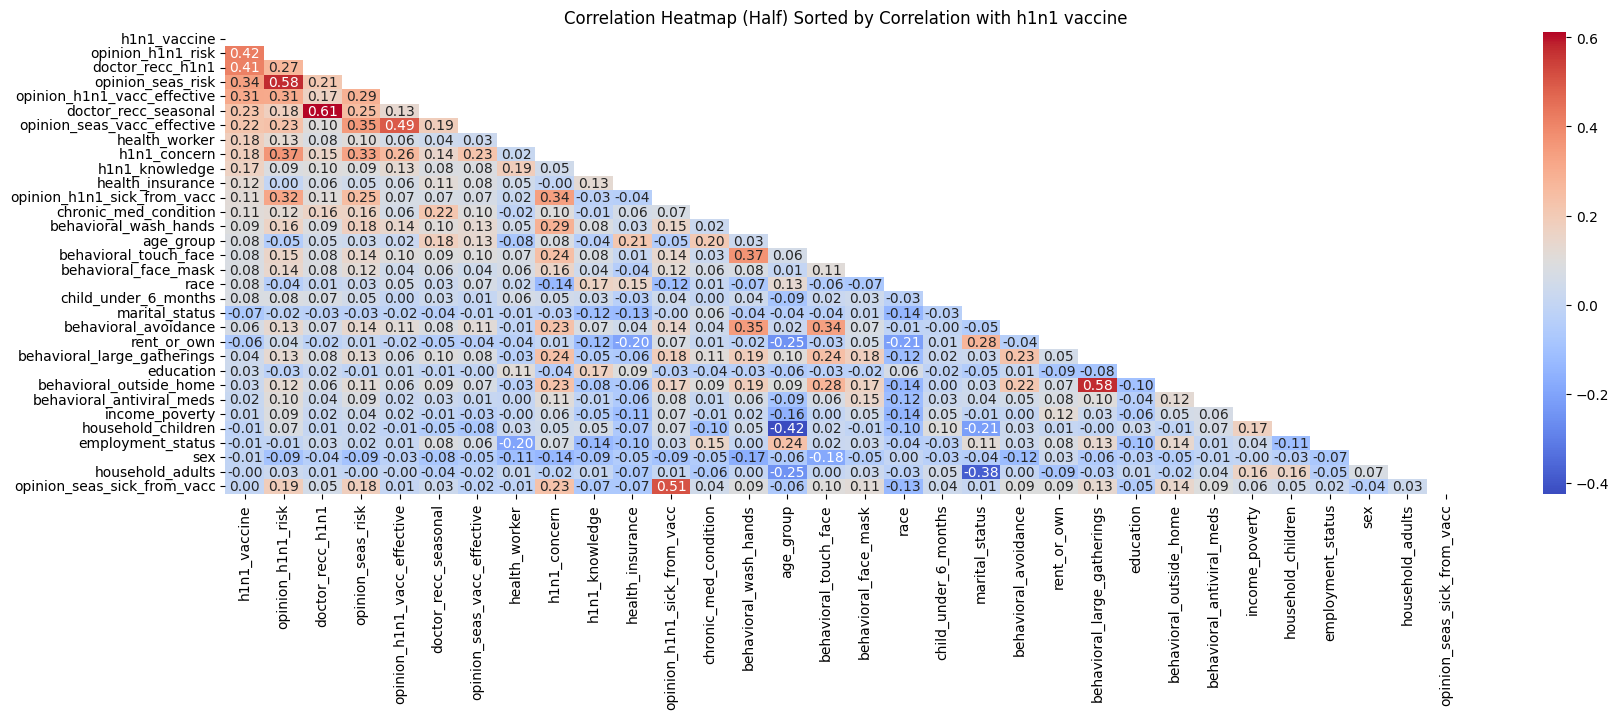

In [44]:
# Calculate the correlation with "h1n1 vaccine" and sort by absolute correlation value in descending order
correlation_with_target = data.corr()["h1n1_vaccine"].abs().sort_values(ascending=False)

# Select the top features that have the highest correlation with "h1n1 vaccine"
top_features = correlation_with_target.index

# Create a subset of the data containing only the top correlated features
subset_data = data[top_features]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Select only the upper half of the correlation matrix to avoid duplication
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title("Correlation Heatmap (Half) Sorted by Correlation with h1n1 vaccine")
plt.show()


Based on the correlation heatmap above, the top five features highly correlated with "h1n1 vaccine" are: 'opinion_h1n1_risk', 'doctor_recc_h1n1', 'opinion_seas_risk', 'opinion_h1n1_vacc_effective', and 'doctor_recc_seasonal'. Therefore, I have decided to select these five features for training an SVM model.

In [45]:
X_train_5_features = X_train_encode_df[['opinion_h1n1_risk','doctor_recc_h1n1', 'opinion_seas_risk','opinion_h1n1_vacc_effective','doctor_recc_seasonal']]
X_test_5_features = X_test_encode_df[['opinion_h1n1_risk','doctor_recc_h1n1', 'opinion_seas_risk','opinion_h1n1_vacc_effective','doctor_recc_seasonal']]

In [46]:
#svm_modelB_pca = classification_experiment(X_train_pca, y_train, X_test_pca, y_test,'svm')
svm_modelB = classification_experiment(X_train_5_features, y_train, X_test_5_features, y_test,'svm')

In [47]:
svm_modelB_df = pd.DataFrame([svm_modelB])
svm_modelB_df

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime
0,0.8206,0.7814,0.5845,0.6687,0.8034 (+/- 0.0244),0.841,0.7154,0.9266,"[0.7508217024006908, 0.7992950997875339, 0.149...",22.8407


In [48]:
combined_results2 = pd.concat([orginal_svm_model, svm_modelB_df], ignore_index=True)
combined_results2['Algorithm'] = ['Original_SVM','5_features_SVM'] 
combined_results2

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime,Algorithm
0,0.8389,0.8231,0.6113,0.7015,0.8566 (+/- 0.0230),0.8715,0.7897,0.9410,"[0.8264707891269085, 0.6756149981688773, 0.170...",26.6617,Original_SVM
1,0.8206,0.7814,0.5845,0.6687,0.8034 (+/- 0.0244),0.8410,0.7154,0.9266,"[0.7508217024006908, 0.7992950997875339, 0.149...",22.8407,5_features_SVM


+ Comparing the original SVM model with the SVM model using the top 5 selected features, we observe a slight drop in accuracy and precision. However, the significant reduction in runtime suggests that these five features remain effective in the model.
+ I selected 5 features from the original input set to train and optimize Model B. Model B's performance on unseen data is evaluated with metrics including AUC-ROC, accuracy, precision, recall, and F1-score. Model B achieved good performance as well.

#### Compare with Model A and Model B

In [49]:
combined_results3 = pd.concat([improved_lr_model, svm_modelB_df], ignore_index=True)
combined_results3['Algorithm'] = ['improved_lr_model','5_features_SVM'] 
combined_results3['Model'] = ['Model_A','Model_B'] 
combined_results3

,Accuracy,Precision,Sensitivity(Recall),F1-Score,mean_AUC_5_folds,roc_auc,AUC_PR,specificity,y_pred_prob,Runtime,Algorithm,Model
0,0.8281,0.7804,0.6193,0.6906,0.8588 (+/- 0.0194),0.8714,0.7760,0.9218,"[0.9219409890154878, 0.7290306601843952, 0.169...",0.0015,improved_lr_model,Model_A
1,0.8206,0.7814,0.5845,0.6687,0.8034 (+/- 0.0244),0.8410,0.7154,0.9266,"[0.7508217024006908, 0.7992950997875339, 0.149...",22.8407,5_features_SVM,Model_B


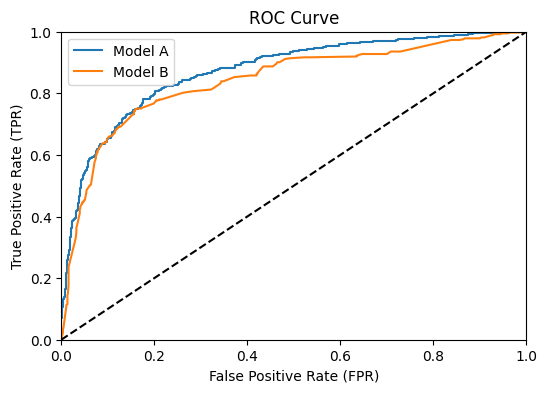

In [50]:
# get y_pred_prob in model A (improved_lr_model)
y_pred_prob_a = improved_lr_model['y_pred_prob'][0]
fpr_a, tpr_a, thresholds_a = roc_curve(y_test, y_pred_prob_a, pos_label=1)

# get y_pred_prob in model B (5_features_SVM)
y_pred_prob_b = svm_modelB_df['y_pred_prob'][0]
fpr_b, tpr_b, thresholds_b = roc_curve(y_test, y_pred_prob_b, pos_label=1)

# Plot the ROC curves of models A and B
plt.figure(figsize=(6, 4))
plt.plot(fpr_a, tpr_a, label='Model A')
plt.plot(fpr_b, tpr_b, label='Model B')  
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

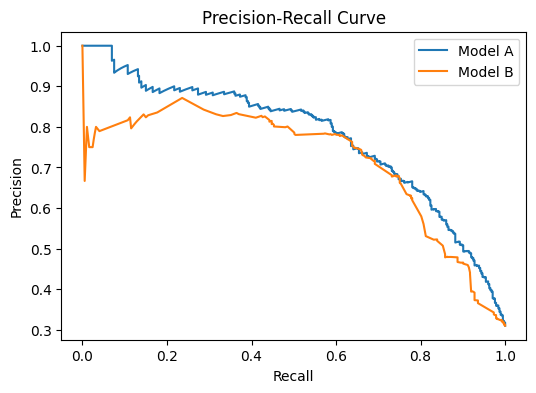

In [51]:
from sklearn.metrics import precision_recall_curve

# calculate PR curve in model A and model B
precision_a, recall_a, _ = precision_recall_curve(y_test, y_pred_prob_a, pos_label=1)
precision_b, recall_b, _ = precision_recall_curve(y_test, y_pred_prob_b, pos_label=1) 

# Plot the PR curves of models A and B
plt.figure(figsize=(6, 4))
plt.plot(recall_a, precision_a, label='Model A')
plt.plot(recall_b, precision_b, label='Model B')  
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

+ Comparing the table between Model A and Model B based on the provided metrics, Model A exhibits higher accuracy, sensitivity (recall), F1-Score, ROC AUC, AUC PR, and specificity, along with a shorter runtime compared to Model B. 

+ Analyzing the ROC curves, Model A's curve is positioned closer to the ideal value of 1. This suggests that Model A achieves a better balance between true positive rate (sensitivity) and false positive rate, making it more reliable in distinguishing between classes.

+ Similarly, when examining the PR curves, Model A's curve approaches the top-right corner. This indicates that Model A performs exceptionally well in identifying positive cases while minimizing false positives, which is especially vital in scenarios with imbalanced datasets.

+ In summary, Model A showcases higher predictive accuracy, efficiency, and a better trade-off between true positives and false positives, positioning it as the best choice for this task.

#### Discussion

In the process of completing this project, I have gained a deeper understanding of machine learning, particularly in the context of binary classification problems. I now feel more confident in distinguishing between classification and regression tasks, which is a valuable skill.

One of the most challenging aspects of this project was fine-tuning the models. I encountered difficulties in consistently improving the accuracy and precision of the models through hyperparameter tuning. In some cases, after fine-tuning, the model's performance even declined. This highlights the complexity and sensitivity of machine learning models to parameter changes and the need for careful experimentation.

Additionally, I discovered that the specific data preprocessing steps can significantly impact the model's performance. The choice of feature selection, encoding methods, and handling of missing values can lead to different results. This underscores the importance of data preprocessing in the overall machine learning pipeline.

In terms of future directions, I plan to explore more advanced techniques for hyperparameter tuning and feature engineering to further enhance model performance. Additionally, I aim to continue improving my understanding of different machine learning algorithms and their applicability to various real-world problems.
